# **20 Newsgroups Text Classification with Neural Networks**
## **📋 Project Overview**
This notebook demonstrates a complete text classification pipeline using the famous 20 **Newsgroups dataset**. The project implements an **Artificial Neural Network (ANN)** to classify text documents into 20 different newsgroup categories. This is a classic multi-class text classification problem that showcases fundamental NLP and deep learning techniques.

## **🎯 Objectives**
* Load and explore the 20 Newsgroups dataset
* Perform comprehensive text preprocessing and cleaning
* Apply TF-IDF vectorization for feature extraction
* Build and train a neural network classifier
* Evaluate model performance with detailed metrics

## **📊 Dataset Information**
The 20 Newsgroups dataset contains approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. Each document belongs to one of these categories, making it perfect for supervised learning tasks.

<hr>

## **🔍 Data Loading and Exploration**
### **Initial Dataset Exploration**

In [1]:
!ls /kaggle/input/20-newsgroup-original

20_newsgroup


**Purpose**: This command lists the contents of the dataset directory to understand the file structure and organization of the 20 newsgroups data.

## **Loading Raw Text Data**

In [2]:
import pandas as pd

data = []

import os
for dirname, subdir, filenames in os.walk('/kaggle/input/20-newsgroup-original'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        with open(file_path, 'r', errors="ignore") as file:
            content = file.read()
            category = os.path.basename(dirname)
            data.append((category, content))

### **What's happening here:**
* **Recursive Directory Traversal**: Uses os.walk() to navigate through all subdirectories
* **File Reading**: Each text file is read with errors="ignore" to handle encoding issues
* **Category Extraction**: The category label is extracted from the directory name
* **Data Collection**: Creates tuples of (category, content) for each document

### **Key Design Decisions:**
Using `errors="ignore"` handles potential encoding issues gracefully
Extracting category from directory structure assumes organized file hierarchy
Storing as list of tuples provides flexibility for DataFrame creation

## **Creating Structured DataFrame**

In [3]:
df = pd.DataFrame(data, columns=['category', 'text'])

**Purpose**: Converts the raw data into a structured pandas DataFrame with clearly defined columns for easier manipulation and analysis.

## **🧹 Text Preprocessing Pipeline**
Text preprocessing is crucial for NLP tasks as raw text contains noise that can negatively impact model performance. Our pipeline includes several cleaning steps:
## **1. Punctuation Removal**

In [4]:
import string
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

#### **Function Explanation:**
* **`string.punctuation`**: Contains all standard punctuation marks (!"#$%&'()*+,-./:;<=>?@[]^_`{|}~)
* **`str.maketrans()`**: Creates a translation table for character removal
* **Purpose**: Removes noise that doesn't contribute to semantic meaning

### **2. Advanced Text Cleaning Functions**

In [5]:
import re
def clean_digits(text):
    return re.sub(r'\d+', '', text)
def clean_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
def clean_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

#### **Function Breakdown:**
* **`clean_digits()`**: Removes all numeric sequences using regex `\d+`
* **`clean_special_chars()`**: Keeps only alphabetic characters and whitespace
* **`clean_extra_whitespace()`**: Normalizes multiple spaces to single spaces and trims

### **3. Applying Preprocessing Pipeline**

In [6]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_punc)
df['text'] = df['text'].apply(clean_digits)
df['text'] = df['text'].apply(clean_special_chars)
df['text'] = df['text'].apply(clean_extra_whitespace)

#### **Sequential Processing:**
* **Lowercase Conversion**: Ensures case consistency
* **Punctuation Removal**: Eliminates punctuation marks
* **Digit Removal**: Removes numeric content
* **Special Character Cleaning**: Keeps only letters and spacesWhitespace Normalization: Standardizes spacing

## **4. Stop Words Removal**

In [7]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stop_words])

df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **Stop Words Concept:**
* **Definition:** Common words (the, is, at, which, on) that appear frequently but carry little semantic meaning
* **Impact:** Removing them reduces feature space and focuses on meaningful content
* **Implementation:** Uses NLTK's predefined English stop words list

### **5. Tokenization**

In [8]:
df['tokens'] = df['text'].str.split()

**Purpose:** Converts cleaned text into lists of individual words (tokens) for further analysis or processing.
### **6. Data Inspection**


In [9]:
df['text'][1]
df['tokens'][1]

['path',
 'cantaloupesrvcscmuedudasnewsharvardedunocnearnethowlandrestonansnetnewsserverjvncnetrutgersigorrutgerseduathosrutgerseduchristian',
 'keneacsbuedu',
 'kenneth',
 'engel',
 'newsgroups',
 'socreligionchristian',
 'subject',
 'atheists',
 'hell',
 'messageid',
 'mayathosrutgersedu',
 'date',
 'may',
 'gmt',
 'sender',
 'hedrickathosrutgersedu',
 'organization',
 'boston',
 'university',
 'boston',
 'usa',
 'lines',
 'approved',
 'christianaramisrutgersedu',
 'imagine',
 'worst',
 'depth',
 'despair',
 'youve',
 'ever',
 'encountered',
 'worst',
 'physical',
 'pain',
 'youve',
 'ever',
 'experienced',
 'people',
 'suffer',
 'emotional',
 'physical',
 'mental',
 'anguish',
 'lives',
 'deaths',
 'seem',
 'merciful',
 'least',
 'pain',
 'end',
 'death',
 'lived',
 'hundred',
 'lives',
 'conclusion',
 'one',
 'instantly',
 'reborn',
 'another',
 'lived',
 'million',
 'billion',
 'years',
 'state',
 'kept',
 'going',
 'forever',
 'happen',
 'jesus',
 'dont',
 'think',
 'heard',
 'li

**Purpose:** Displays sample processed text and tokens to verify the preprocessing pipeline's effectiveness.
<hr>

## **Data Splitting Strategy**
### **🎯 Three-Way Split Implementation**
Our data splitting strategy creates three distinct sets for robust model development:
### **Primary Split: Train/Validation vs Test**

In [10]:
from sklearn.model_selection import train_test_split

# ✅ 15% test set
train_val_texts, test_texts, train_val_labels, test_labels = train_test_split(
    df['text'], df['category'], test_size=0.15, random_state=42, stratify=df['category']
)

#### **Key Parameters:**

* **`test_size=0.15`:** Reserves 15% of data for final testing
* **`random_state=42`:** Ensures reproducible splits
* **`stratify=df['category']`:** Maintains proportional class distribution across splits

## **Secondary Split: Train vs Validation**

In [11]:
# ✅ ~17.65% of 85% = 15% of original total → for validation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_val_texts, train_val_labels, test_size=0.1765, random_state=42, stratify=train_val_labels
)

#### **Mathematical Calculation**:

* Original data: 100%
* After first split: 85% remains
* Validation from remaining: 0.1765 × 85% ≈ 15% of original
* **Final Distribution:** ~70% Train, 15% Validation, 15% Test

<hr>

## **Data Set Analysis**
### **📊 Set Sizes**

In [12]:
print(f"Train set size: {len(train_texts)}")
print(f"Validation set size: {len(val_texts)}")
print(f"Test set size: {len(test_texts)}")

Train set size: 27994
Validation set size: 6000
Test set size: 6000


**Purpose:** Verifies the actual sizes of each split to ensure proper data distribution.
### **🔍 Sample Data Inspection**

In [13]:
print("Train sample:", train_texts.iloc[0])
print("Validation sample:", val_texts.iloc[0])
print("Test sample:", test_texts.iloc[0])

Train sample: newsgroups compsysmachardware path cantaloupesrvcscmuedudasnewsharvardedunocnearnethowlandrestonansnetgatechnewsfeedpeachneteduumnedumolbiocbsumneduhorton hortonmolbiocbsumnedu robert horton subject macs suck buy pc messageid couopftnewscisumnedu sender newsnewscisumnedu usenet news administration nntppostinghost molbiocbsumnedu organization university minnesota xnewsreader tin pl references netnewsupennedu date sun apr gmt lines tests suck post real message
Validation sample: path cantaloupesrvcscmuedurochesterudelwupostuunetpipexwarwickwarwicknotformail csulocsvwarwickacuk mr j brown newsgroups scielectronics subject rpm floopy drives update date apr organization computing services university warwick uk lines messageid rgdminndglclovercsvwarwickacuk references rjlinnfclovercsvwarwickacuk cwieegnmsukyedu nntppostinghost clovercsvwarwickacuk article cwieegnmsukyedu msundemikukyedu writes hopefully sort bad quid normally pardon ignorance foreign currency exchange rates qui

**Purpose:** Examines sample texts from each set to verify preprocessing quality and data integrity.
## **Class Distribution Analysis**
Understanding class distribution is crucial for identifying potential data imbalances that could affect model performance.

In [14]:
print("Train class distribution:")
print(train_labels.value_counts())

print("\nValidation class distribution:")
print(val_labels.value_counts())

print("\nTest class distribution:")
print(test_labels.value_counts())

Train class distribution:
category
comp.sys.mac.hardware       1400
rec.motorcycles             1400
talk.politics.mideast       1400
talk.politics.guns          1400
comp.graphics               1400
talk.politics.misc          1400
sci.med                     1400
comp.windows.x              1400
rec.sport.hockey            1400
sci.crypt                   1400
sci.electronics             1400
sci.space                   1400
alt.atheism                 1400
comp.sys.ibm.pc.hardware    1400
rec.autos                   1400
talk.religion.misc          1400
comp.os.ms-windows.misc     1400
rec.sport.baseball          1400
misc.forsale                1399
soc.religion.christian      1395
Name: count, dtype: int64

Validation class distribution:
category
misc.forsale                301
sci.electronics             300
talk.politics.misc          300
talk.politics.guns          300
alt.atheism                 300
talk.religion.misc          300
sci.space                   300
rec.motorcycle

#### **Why This Matters:**
* **Balanced Classes:** Helps identify if any newsgroup category is under/over-represented
* **Stratification Verification:** Confirms that stratified splitting maintained proportional distributions
* **Model Bias Prevention:** Ensures the model won't be biased toward majority classes
<hr>

## **Feature Engineering: Vectorization**
Text data needs to be converted into numerical format for machine learning algorithms. We use TF-IDF vectorization, a sophisticated technique that captures both term frequency and document importance.
### **🔤 TF-IDF Vectorization**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english"
)

#### **TF-IDF Parameters Explained:**

* **`max_features=5000`**: Limits vocabulary to top 5000 most important terms
    * *Benefit*: Reduces dimensionality and computational complexity
    * *Trade-off*: May lose some less common but potentially meaningful terms

* **`ngram_range=(1, 2)`**: Includes both unigrams and bigrams
    * *Unigrams*: Single words ("machine", "learning")
    * *Bigrams*: Two-word phrases ("machine learning", "neural network")
    * *Advantage*: Captures both individual words and meaningful phrases

* **stop_words="english"**: Additional stop word filtering
    * *Purpose*: Removes common English words that don't contribute to classification
    * *Note*: Provides backup filtering even after our manual preprocessing

### **Vector Transformation**

In [16]:
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)
X_test = vectorizer.transform(test_texts)

### **Critical Process Details:**
* **`fit_transform(train_texts)`**: Learns vocabulary from training data AND transforms it
* **`transform(val_texts/test_texts)`**: Only transforms using learned vocabulary
* **Data Leakage Prevention**: Vocabulary is learned only from training data

**Mathematical Concept**: TF-IDF combines:

* **Term Frequency (TF)**: How often a term appears in a document
* **Inverse Document Frequency (IDF)**: How rare/common a term is across all documents
* **Formula**: TF-IDF = TF × log(Total Documents / Documents containing term)

<hr>

## **Neural Network Implementation**
### **🧠 Label Encoding for Multi-Class Classification**
### **Step 1: Label Preprocessing**

### 🧩 Step 1: Encode Labels for ANN

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 1. Initialize label encoder
le = LabelEncoder()

# 2. Fit on ALL categories (so train/val/test share the same mapping)
le.fit(df['category'])

2025-08-20 15:36:17.756900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755704178.024147      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755704178.101385      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


LabelEncoder()

#### **Why Fit on All Categories:**
* **Consistency**: Ensures same label-to-number mapping across all splits
* **Completeness**: Handles edge cases where a category might be missing in train/val
* **Reproducibility**: Maintains consistent encoding across different runs

### **Step 2: Integer Transformation**

In [18]:
# 3. Transform labels into integers
y_train_int = le.transform(train_labels)
y_val_int   = le.transform(val_labels)
y_test_int  = le.transform(test_labels)

#### **Label Encoding Process:**
* Converts string categories ("comp.graphics", "sci.space", etc.) to integers (0, 1, 2, ...)
* Creates numerical representation suitable for mathematical operations

### **Step 3: One-Hot Encoding**

In [19]:
# 4. Convert integers → one-hot vectors
y_train = to_categorical(y_train_int)
y_val   = to_categorical(y_val_int)
y_test  = to_categorical(y_test_int)

#### **One-Hot Encoding Explanation:**
* **Purpose**: Converts integer labels to binary vectors
* **Example**: Category 2 (out of 20) becomes [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
* **Benefit**: Prevents the model from assuming ordinal relationships between categories

### **Step 4: Shape Verification**

In [20]:
# 5. Check shapes
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

y_train shape: (27994, 20)
y_val shape: (6000, 20)
y_test shape: (6000, 20)


#### **Expected Output Format:**
* Shape should be (n_samples, 20) where 20 is the number of newsgroup categories
* Each row sums to 1.0 (exactly one category per document)

<hr>

## **🧠 Neural Network Architecture**
### **Model Initialization**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Initialize model
model = Sequential()

#### **Sequential Model Choice:**
* **Linear Architecture**: Layers are stacked sequentially
* **Simplicity**: Easy to understand and modify
* **Suitability**: Perfect for standard feedforward networks


### **Hidden Layers Design**

In [22]:
# 2. Input + Hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-20 15:36:34.754520: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### **Layer-by-Layer Breakdown:**
### **First Dense Layer:**
* **128 neurons**: Provides sufficient capacity for learning complex patterns
* **ReLU activation**: Rectified Linear Unit - introduces non-linearity while avoiding vanishing gradients
* **input_shape**: Automatically determined from TF-IDF vectors (5000 features)


### **Dropout Layer:**
* **30% dropout rate**: Randomly sets 30% of neurons to zero during training
* **Purpose**: Prevents overfitting by forcing the network to not rely on specific neurons
* **Training vs Inference**: Only active during training, not during prediction


### **Second Dense Layer:**

* **64 neurons**: Smaller than first layer, creating a funnel architecture
* **ReLU activation**: Maintains non-linearity for complex pattern recognition

## **Output Layer**

In [23]:
# 3. Output layer
model.add(Dense(y_train.shape[1], activation='softmax'))

#### **Output Layer Specifications:**

* **Neurons**: `y_train.shape[1]` = 20 (one per newsgroup category)
* **Softmax activation**: Converts raw outputs to probability distribution
* **Probability Sum**: All outputs sum to 1.0, representing classification confidence

### **Model Compilation**

In [24]:
# 4. Compile
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#### **Compilation Parameters:**

* **Loss Function**: `categorical_crossentropy` - optimal for multi-class classification with one-hot labels
* **Optimizer**: `adam` - adaptive learning rate optimizer that works well out-of-the-box
* **Metrics**: `accuracy` - percentage of correctly classified samples

### **Model Training**

In [25]:
# 5. Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7171 - loss: 1.3067 - val_accuracy: 0.9633 - val_loss: 0.1011
Epoch 2/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9691 - loss: 0.0824 - val_accuracy: 0.9597 - val_loss: 0.0881
Epoch 3/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9725 - loss: 0.0640 - val_accuracy: 0.9620 - val_loss: 0.0861
Epoch 4/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9730 - loss: 0.0595 - val_accuracy: 0.9632 - val_loss: 0.0860
Epoch 5/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9752 - loss: 0.0540 - val_accuracy: 0.9592 - val_loss: 0.0849


#### **Training Parameters:**
* **epochs=5**: Number of complete passes through the training data
* **batch_size=32**: Number of samples processed before updating model weights
* **validation_data**: Used for monitoring overfitting during training
* **verbose=1**: Displays progress bars and metrics during training

#### **Training Process:**

* Model learns patterns by minimizing categorical crossentropy loss
* Weights are updated using backpropagation and Adam optimizer
* Validation metrics help monitor generalization performance

<hr>

## **Model Evaluation and Analysis**
### **🔍 Comprehensive Performance Assessment**
#### **Prediction Generation**

### 🧩 Step 4: Model Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict on test set (probabilities)
y_pred_probs = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


### **Prediction Process:**
* **Output**: Probability distribution over all 20 categories for each test sample
* **Shape**: `(n_test_samples, 20)` where each row sums to 1.0
* **Interpretation**: Higher probability indicates higher confidence for that category

## **Converting Probabilities to Labels**

In [27]:
# 2. Convert probabilities → class labels (argmax)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)  # convert one-hot back to integers

### **Conversion Logic:**

* **`np.argmax()`**: Finds index of highest probability
* **Final Prediction**: Category with maximum predicted probability
* **Ground Truth**: Converts one-hot encoded labels back to integer format

## **Confusion Matrix Visualization**

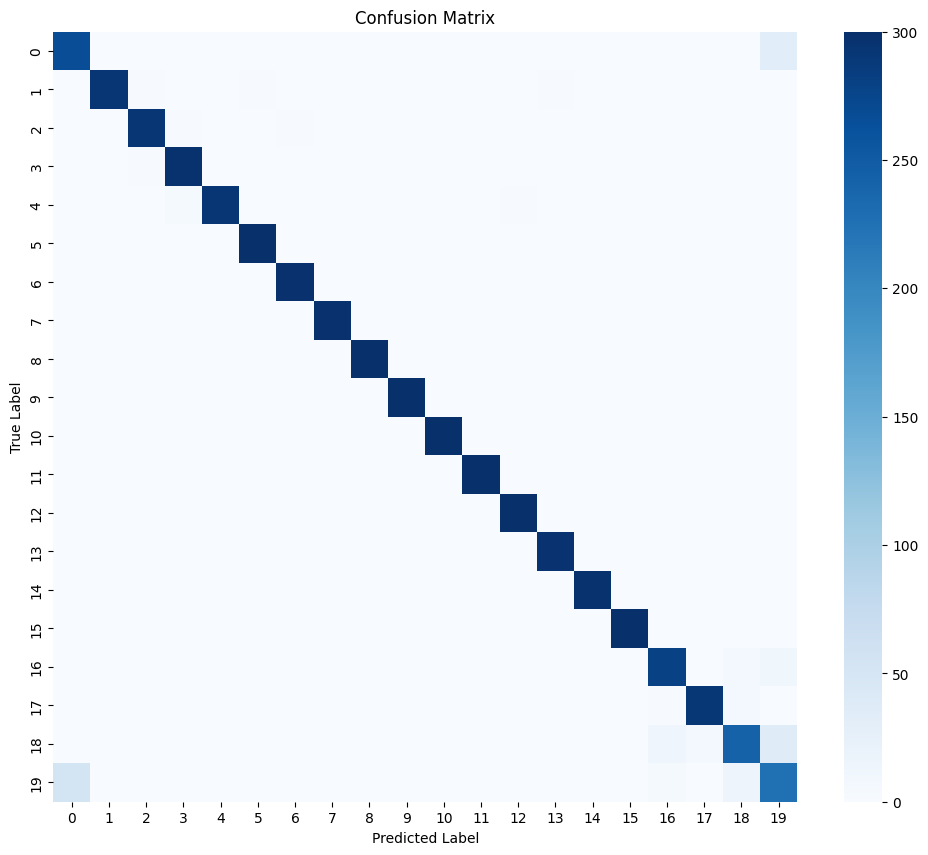

In [28]:
# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Confusion Matrix Insights:**
* **Diagonal Elements**: Correct predictions (True Positives for each class)
* **Off-Diagonal Elements**: Misclassifications
* **Perfect Classifier**: Would show only diagonal elements
* **Visual Analysis**: Darker blue indicates higher values

### **Interpretation Guide:**

* Strong diagonal = good overall performance
* Scattered off-diagonal = confusion between specific categories
* Systematic patterns = potential class similarity issues

## **Detailed Classification Report**

In [29]:
# 4. Classification Report (Accuracy, Precision, Recall, F1 per class)
print(classification_report(y_true, y_pred, target_names=le.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.89      0.86       300
           comp.graphics       0.99      0.98      0.98       300
 comp.os.ms-windows.misc       0.99      0.98      0.98       300
comp.sys.ibm.pc.hardware       0.97      0.99      0.98       300
   comp.sys.mac.hardware       1.00      0.98      0.99       300
          comp.windows.x       0.99      1.00      1.00       300
            misc.forsale       0.99      0.99      0.99       300
               rec.autos       0.99      0.99      0.99       300
         rec.motorcycles       1.00      1.00      1.00       300
      rec.sport.baseball       1.00      1.00      1.00       300
        rec.sport.hockey       1.00      1.00      1.00       300
               sci.crypt       1.00      1.00      1.00       300
         sci.electronics       0.98      1.00      0.99       300
                 sci.med       0.99      0.99      0.99       300
         

### **Metrics Explanation:**
#### **Per-Class Metrics:**
* **Precision**: Of all predicted category X, how many were actually category X?
* **Recall**: Of all actual category X, how many did we correctly identify?
* **F1-Score**: Harmonic mean of precision and recall

#### **Overall Metrics:**
* **Accuracy**: Percentage of all predictions that were correct
* **Macro Average**: Unweighted average across all classes
* **Weighted Average**: Weighted by class frequency

#### **Business Impact:**
* High precision = Low false positives
* High recall = Low false negatives
* High F1-score = Balanced precision and recall

<hr>

## **🔧 Model Architecture Summary**
### **Network Structure:**

```

    Input Layer (5000 features from TF-IDF)
        ↓
    Dense Layer (128 neurons, ReLU)
        ↓
    Dropout Layer (30% dropout)
        ↓
    Dense Layer (64 neurons, ReLU)
        ↓
    Output Layer (20 neurons, Softmax)


```

### **Key Design Decisions:**
* **Feature Engineering**: TF-IDF with bigrams captures semantic meaning
* **Architecture**: Funnel design (128 → 64 → 20) gradually reduces complexity
* **Regularization**: Dropout prevents overfitting
* **Activation**: ReLU for hidden layers, Softmax for multi-class output

## **🛠️ Tools and Libraries**
### **Essential Libraries:**
* **pandas**: Data manipulation and analysis
* **scikit-learn**: Machine learning utilities and metrics
* **TensorFlow/Keras**: Deep learning framework
* **NLTK**: Natural language processing toolkit
* **matplotlib/seaborn**: Data visualization

## **Development Environment:**
* **Jupyter Notebooks**: Interactive development
* **Google Colab**: Free GPU access for training
* **Kaggle Kernel**s: Competition environment with datasets

<hr>

*This notebook demonstrates a complete end-to-end text classification pipeline, from raw text processing to neural network evaluation. The 20 Newsgroups dataset serves as an excellent benchmark for understanding multi-class text classification challenges and solutions.*